# Script - Desafio 1

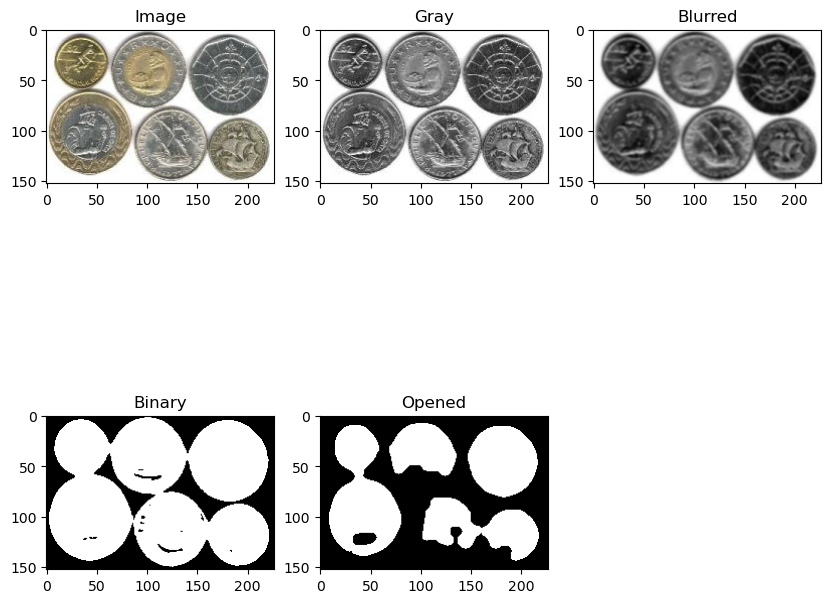

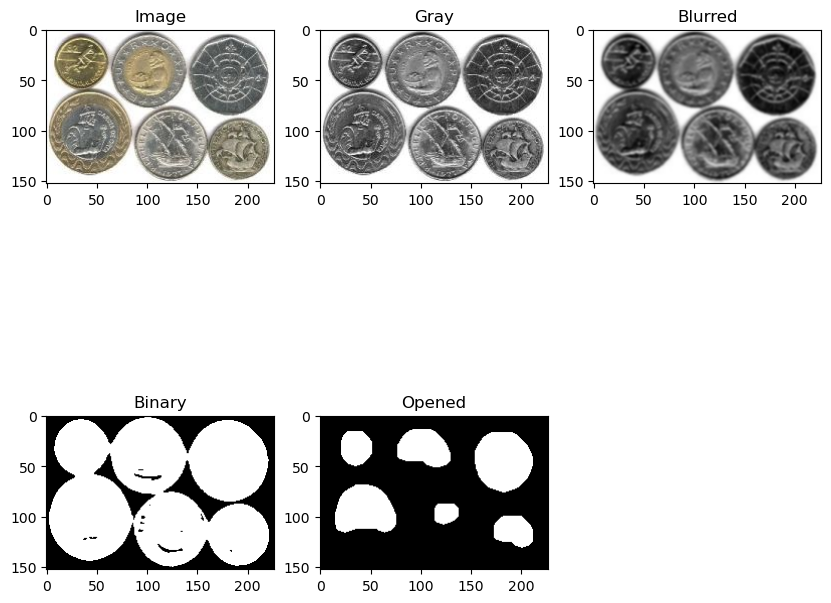

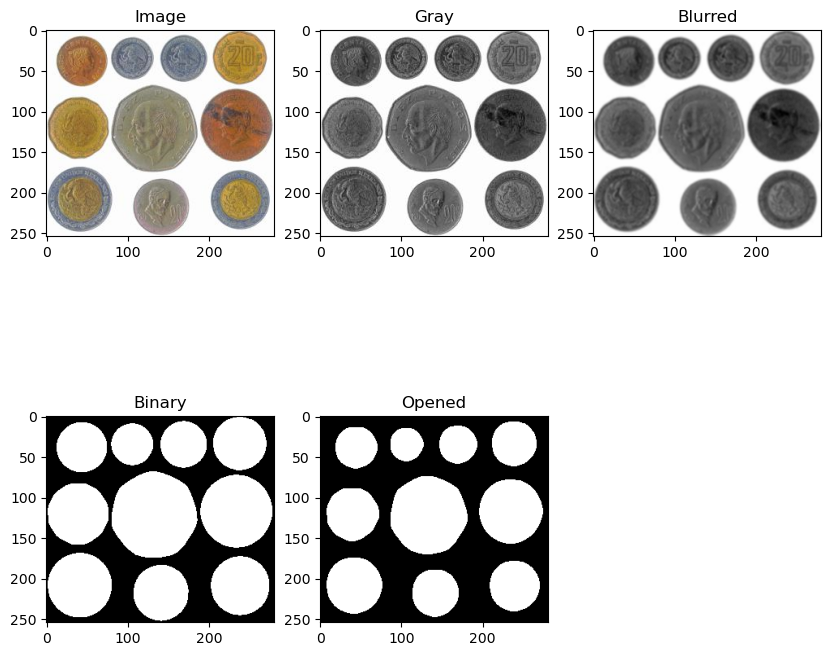

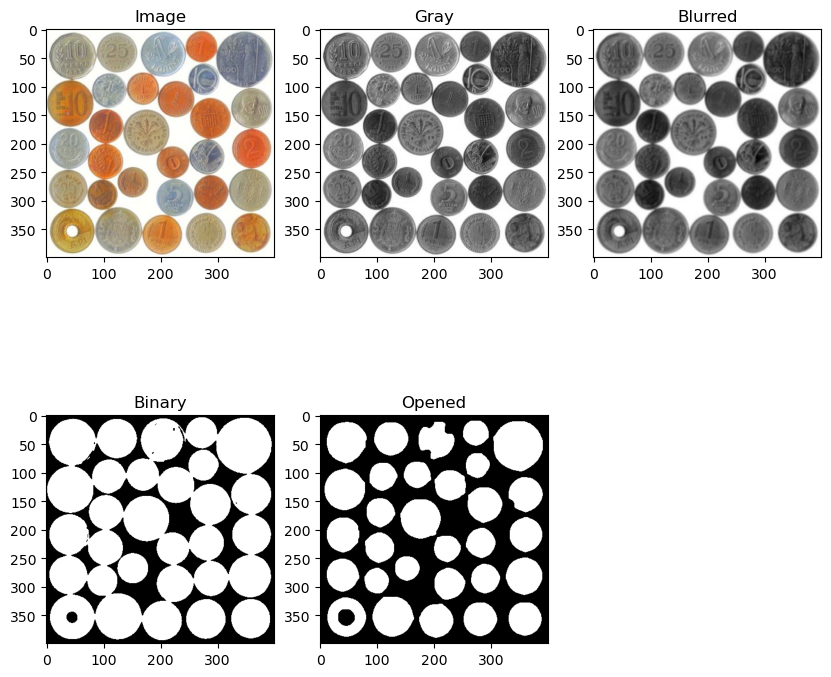

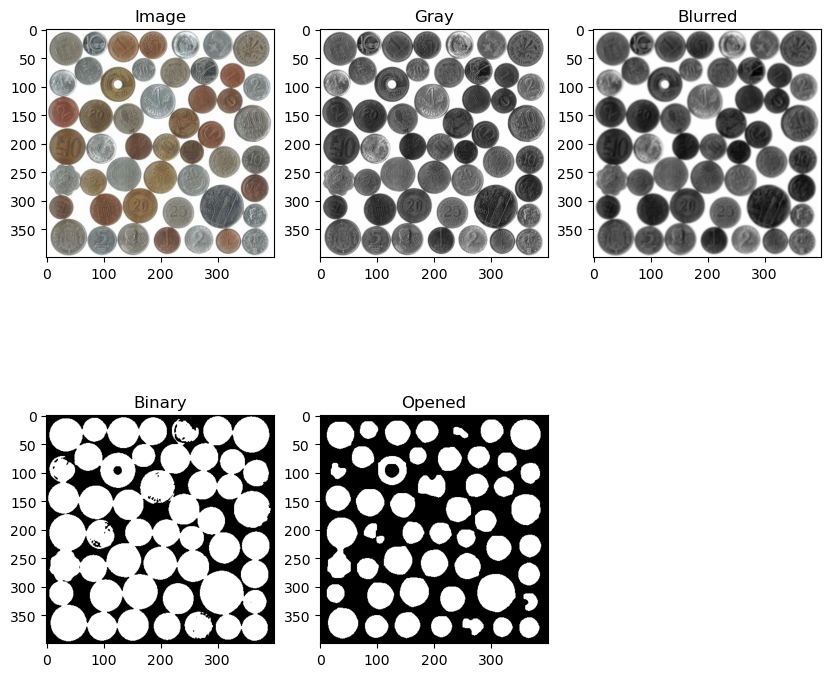

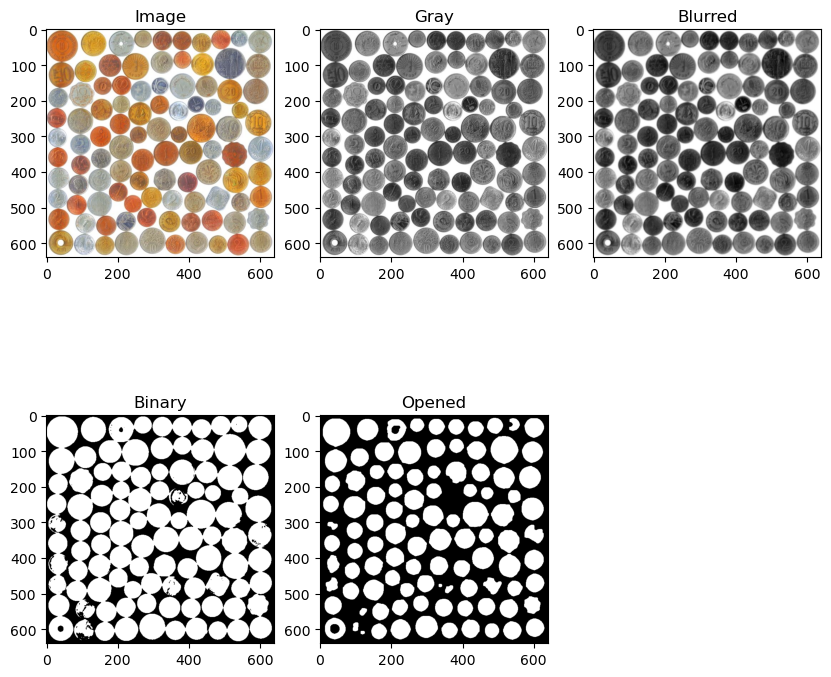

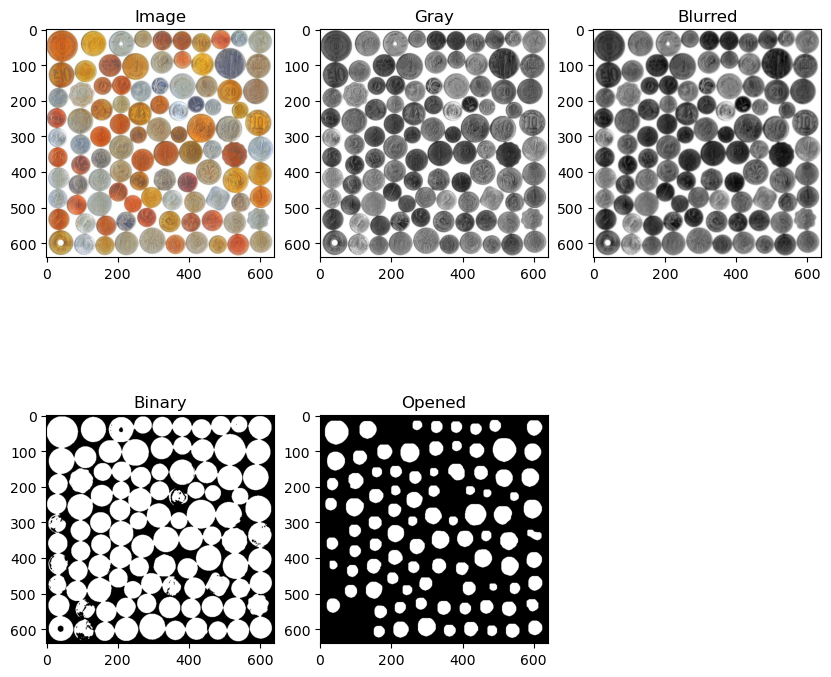

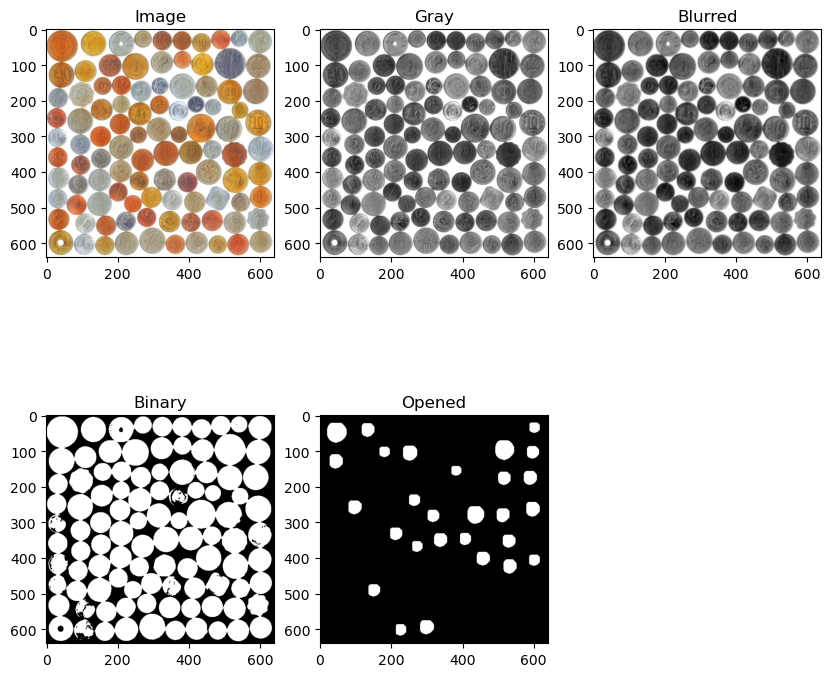

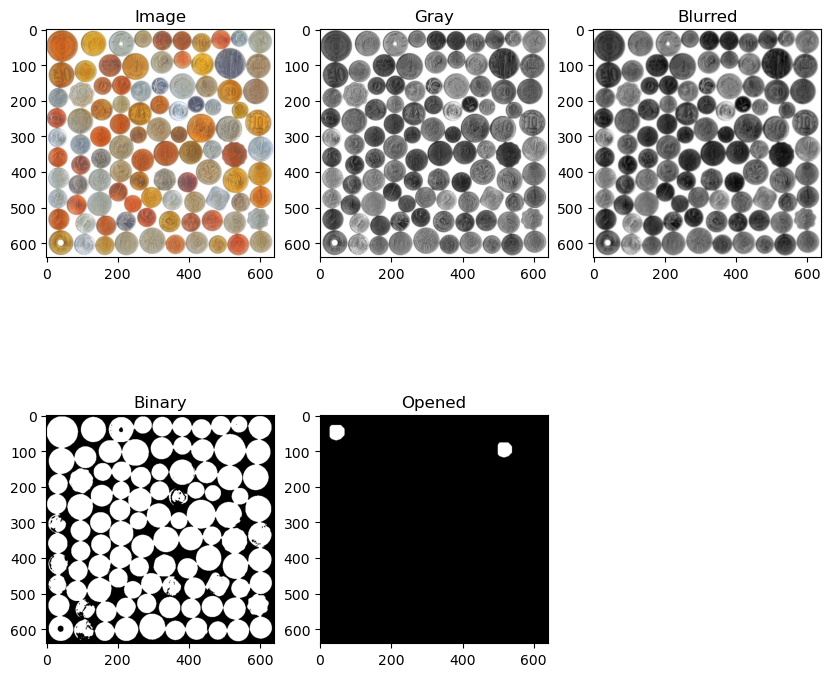

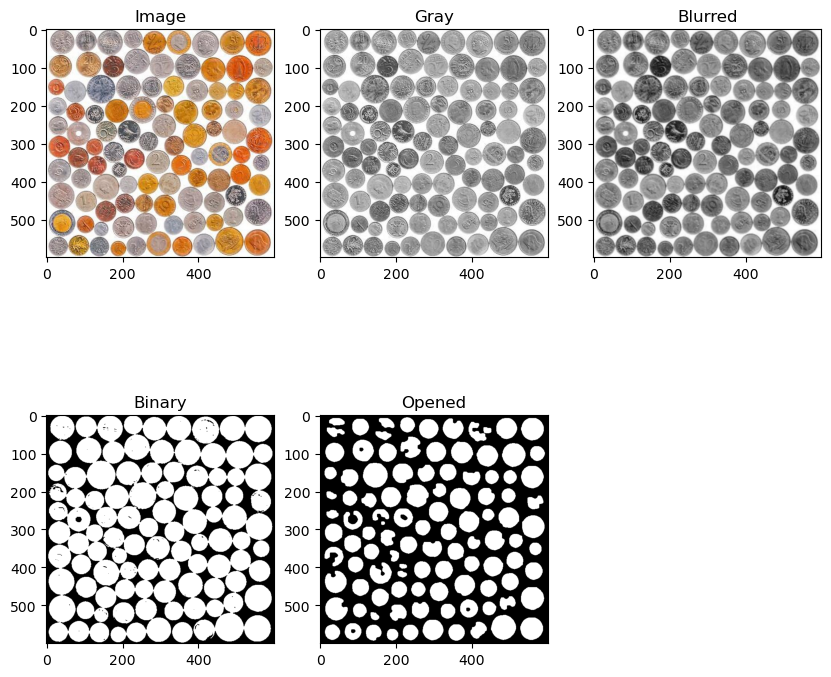

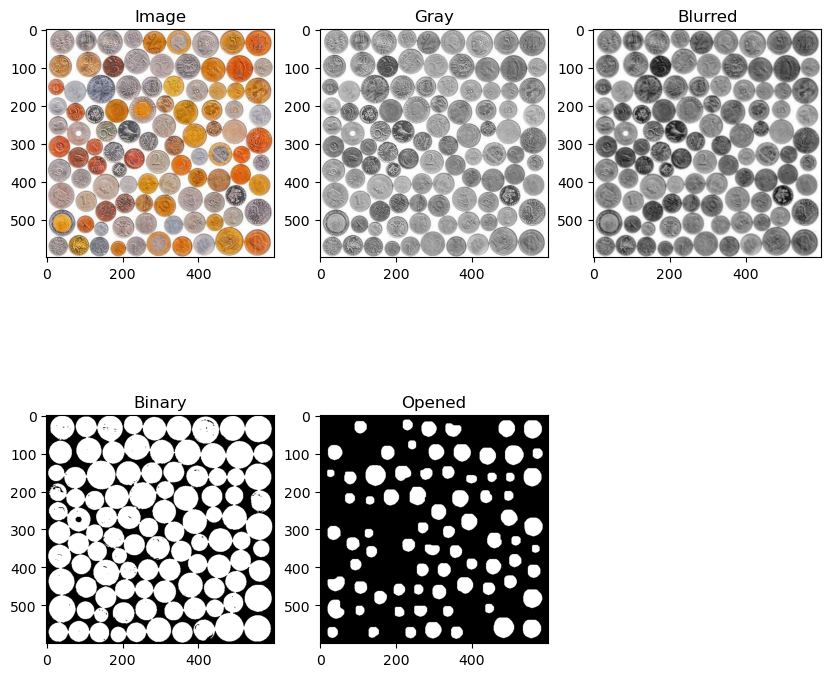

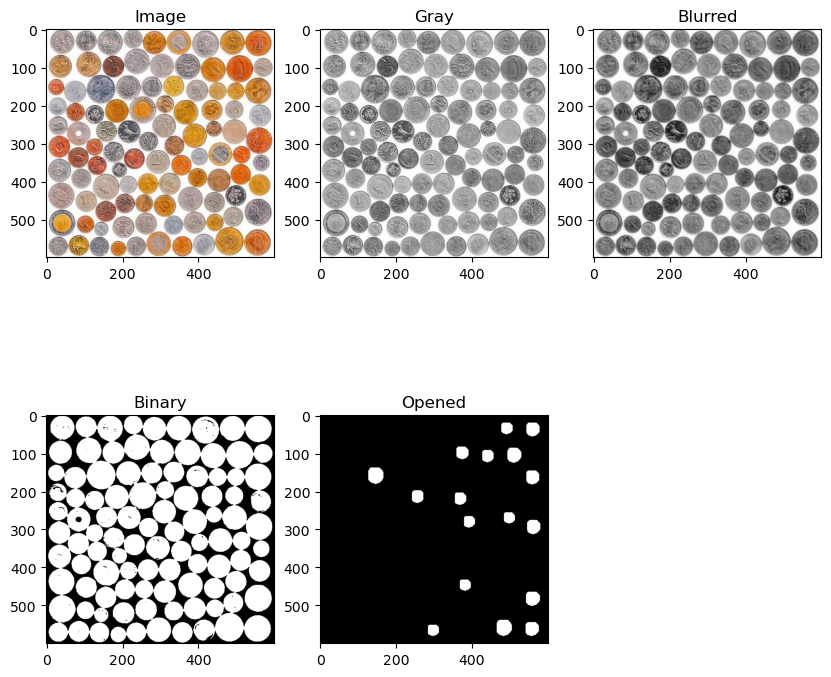

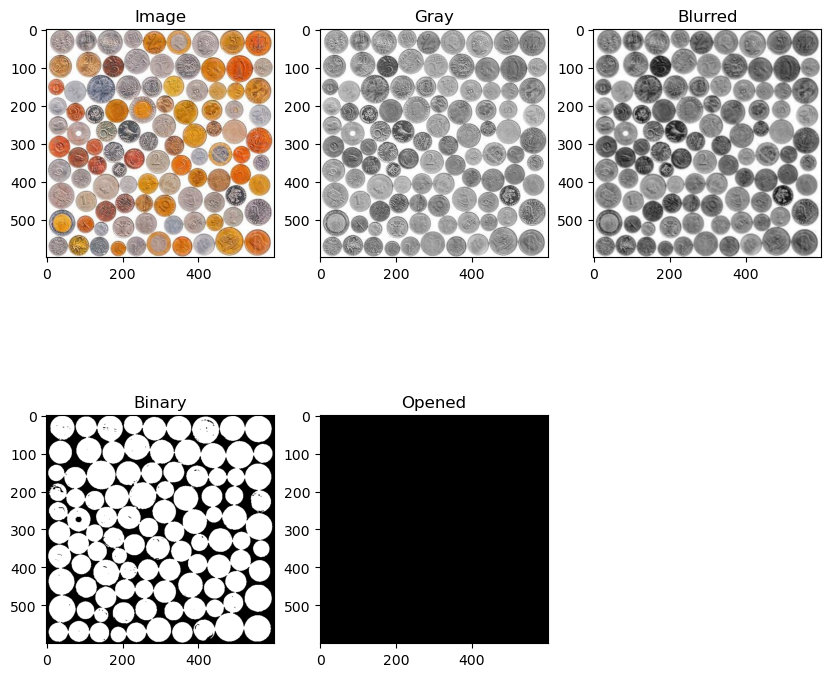

coins6.jpg:
	True Count: 6
	Best Count: 6
	Error: 0
	Relative Error: 0.00%
	Best Iteration: 2
	Output Image Path: /Users/marianaborralho/Desktop/M. Ciencia de Dados/2 Semestre/Aprendizagem Profunda para Visão por Computador/Desafio 1/coins6_iter_2.jpg

coins10.jpg:
	True Count: 10
	Best Count: 10
	Error: 0
	Relative Error: 0.00%
	Best Iteration: 1
	Output Image Path: /Users/marianaborralho/Desktop/M. Ciencia de Dados/2 Semestre/Aprendizagem Profunda para Visão por Computador/Desafio 1/coins10_iter_1.jpg

coins30.jpg:
	True Count: 30
	Best Count: 30
	Error: 0
	Relative Error: 0.00%
	Best Iteration: 1
	Output Image Path: /Users/marianaborralho/Desktop/M. Ciencia de Dados/2 Semestre/Aprendizagem Profunda para Visão por Computador/Desafio 1/coins30_iter_1.jpg

coins50.jpg:
	True Count: 50
	Best Count: 50
	Error: 0
	Relative Error: 0.00%
	Best Iteration: 1
	Output Image Path: /Users/marianaborralho/Desktop/M. Ciencia de Dados/2 Semestre/Aprendizagem Profunda para Visão por Computador/De

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def find_coins(image_path, iterations, save_output=False, output_path=None):
    """
    Detecta moedas em uma imagem usando um número especificado de iterações morfológicas.
    Opcionalmente, salva a imagem de saída com as moedas detectadas destacadas.
    """

    image = cv2.imread(image_path)
    if image is None:
        print(f"Não foi possível abrir a imagem: {image_path}")
        return None
   
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Converte a imagem para tons de cinza
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Desfoca a imagem para reduzir o ruído
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Binarização da imagem

    # Definição dos elementos estruturantes para a operação de erosão e dilatação - morfologia
    strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
    erosed = cv2.erode(binary, strel, iterations=iterations)
    strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    opened = cv2.dilate(erosed, strel, iterations=iterations)
    
    # Exibe as etapas intermediárias
    #cv2.imshow("Image", image)
    #cv2.imshow("Gray", gray)  # Exibe a imagem a cinza
    #cv2.imshow("Blurred", blurred)  # Exibe a imagem desfocada
    #cv2.imshow("Binary", binary)  # Exibe a imagem binária
    #cv2.imshow("Opened", opened)  # Exibe a imagem após abertura morfológica
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()
 
    # Exibe as etapas intermediárias - utilizando matplotlib
    plt.figure(figsize=(10, 10))
    plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Image')
    plt.subplot(232), plt.imshow(gray, cmap='gray'), plt.title('Gray')
    plt.subplot(233), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
    plt.subplot(234), plt.imshow(binary, cmap='gray'), plt.title('Binary')
    plt.subplot(235), plt.imshow(opened, cmap='gray'), plt.title('Opened')

    plt.subplots_adjust(hspace=0.005)  # Ajusta o espaço vertical entre as subplots

    plt.show()
    
    num_labels, _, stats, _ = cv2.connectedComponentsWithStats(opened)
    num_labels -= 1  # Exclui o fundo
    
    # Desenha os retângulos e coloca o número de pixels de cada moeda
    for i in range(1, num_labels + 1):
        x, y, w, h, area = stats[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, str(area), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Exibe a imagem com as moedas detectadas destacadas - directorio atual
    if save_output and output_path is not None:
     cv2.imwrite(output_path, image)    
    
    return num_labels

def calculate_relative_error(true_count, detected_count):
    """
    Calcula o erro relativo entre o número real de moedas e o número detetado.
    """
    return np.where(true_count != 0, np.abs(true_count - detected_count) / true_count * 100, 0)

def find_best_iteration(image_path, true_count, iteration_range, output_dir):
    """
    Testa diferentes valores de iteração para encontrar o melhor para a deteção de moedas em uma única imagem.
    Retorna o número de moedas detectado, erro, número de iteração que deu o melhor resultado.
    """
    best_count, min_error, best_iteration, best_output_path = None, float('inf'), None, None
    
    for iterations in iteration_range:
        output_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(image_path))[0]}_iter_{iterations}.jpg")
        detected_count = find_coins(image_path, iterations, save_output=True, output_path=output_path)
        error = abs(true_count - detected_count)
        
        if error < min_error:
            best_count, min_error, best_iteration, best_output_path = detected_count, error, iterations, output_path

        if error == 0:
            break
    
    relative_error = calculate_relative_error(true_count, best_count)
    return best_count, min_error, relative_error, best_iteration, best_output_path

# Dicionário que associa os nomes das imagens ao número verdadeiro de moedas - deverá alterar consoante as imagens que queremos testar
image_files = {
    'coins6.jpg': 6,
    'coins10.jpg': 10,
    'coins30.jpg': 30,
    'coins50.jpg': 50,
    'coins100.jpg': 100,
    'coins101.jpg': 101
}

output_dir = os.getcwd()  # Usa o diretório atual para salvar as imagens de saída
iteration_range = range(1, 5)  # Faixa de iterações para teste

# Dicionário para armazenar os resultados gerais
overall_results = {}

for image_name, true_count in image_files.items():
    image_path = os.path.join(output_dir, image_name)  # Atualiza o caminho se necessário
    best_count, min_error, relative_error, best_iteration, best_output_path = find_best_iteration(image_path, true_count, iteration_range, output_dir)
    overall_results[image_name] = {
        'True Count': true_count,
        'Best Count': best_count,
        'Error': min_error,
        'Relative Error': relative_error,
        'Best Iteration': best_iteration,
        'Output Image Path': best_output_path
    }

# Mostra os resultados obtidos para cada imagem
for image_name, results in overall_results.items():
    print(f"{image_name}:")
    print(f"\tTrue Count: {results['True Count']}")
    print(f"\tBest Count: {results['Best Count']}")
    print(f"\tError: {results['Error']}")
    print(f"\tRelative Error: {results['Relative Error']:.2f}%")
    print(f"\tBest Iteration: {results['Best Iteration']}")
    print(f"\tOutput Image Path: {results['Output Image Path']}\n")
    
# Inicializa as variáveis para calcular os resultados globais
total_relative_error = 0
total_squared_error = 0

# Número de imagens 
num_images = len(image_files)

# Calcula os resultados globais
for results in overall_results.values():
    total_relative_error += results['Relative Error']
    squared_error = (results['True Count'] - results['Best Count']) ** 2
    total_squared_error += squared_error

average_relative_error = total_relative_error / num_images
mean_squared_error = total_squared_error / num_images

# Mostra os resultados globais
print("Global Results for the Image Set:")
print(f"Average Relative Error: {average_relative_error:.2f}%")
print(f"Mean Squared Error (MSE): {mean_squared_error:.2f}")